# Chocolate Bar Reviews
SQL Database Querying Rank Function Window Function External Dataset

You have the following [dataset](https://drive.google.com/file/d/1wG27Iex7Ymg2gc-5UdcnXtuhP7aUBSNK/view)
of chocolate bar ratings. You can assume you have this data in a table called InternationalChocolateRatings.

Can you write a SQL query to summarize the BroadBeanOrigin for US manufactured chocolate bars and provide the number of reviews, average rating, and average cocoa percent?
```
Column Name in CSV 	Column Name for SQL 	Column Type 	Short description
Company 	Company 	string 	Name of the company manufacturing the bar
Specific Bean Origin or Bar Name 	SpecificBeanOrigin 	string 	The specific geo-region of origin for the bar.
REF value 	REFValue 	int 	Value linked to when the review was entered in the database. Higher = more recent.
Review Date 	ReviewDate 	int 	Year of publication of the review.
Cocoa Percent 	CocoaPercent 	double 	Cocoa percentage (darkness) of the chocolate bar being reviewed.
Company Location 	CompanyLocation 	string 	Manufacturer base country.
Rating 	Rating 	int 	Expert rating for the bar.
Bean Type 	BeanType 	string 	The variety (breed) of bean used, if provided.
Broad Bean Origin 	BroadBeanOrigin 	string 	The broad geo-region of origin for the bean.
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

# load csv to pandas df
filename = 'q136_data_flavors_of_cacao.csv'
df = pd.read_csv(filename, encoding='utf-8') # pesky \xa0
# fix column names
translation = {ord(ch):'' for ch in ['\n',' ']} # replace k by v
df.columns = [col.translate(translation) for col in df.columns]

# build sqlite table
engine = create_engine('sqlite://', echo=False)
table_name = 'InternationalChocolateRatings'
df.to_sql(table_name, con=engine)

# query sqlite
query = f"SELECT count(*) FROM {table_name}"
n = engine.execute(query).scalar()# .fetchall()[0][0]
print(f'there are {n} rows in table {table_name}')
print("first row:", engine.execute(f"SELECT * FROM {table_name} limit 1").fetchall())

there are 1795 rows in table InternationalChocolateRatings
first row: [(0, 'A. Morin', 'Agua Grande', 1876, 2016, '63%', 'France', 3.75, None, 'Sao Tome')]


In [2]:
query = f"""
select
    BroadBeanOrigin,
    count(*) as n_reviews,
    avg(Rating) as avg_rating,
    avg(CocoaPercent) as avg_cocoa_pct    
from {table_name}
where CompanyLocation = 'U.S.A.'
group by 1
order by 2 desc
"""

# partially execute so we can get column names
exec_result = engine.execute(query)
cols = exec_result._metadata.keys
rows = exec_result.fetchall() 
df = pd.DataFrame(rows, columns=cols)
df.head()

,BroadBeanOrigin,n_reviews,avg_rating,avg_cocoa_pct
0,Dominican Republic,96,3.169271,72.098958
1,Peru,76,3.095395,70.723684
2,Venezuela,73,3.092466,72.356164
3,Ecuador,71,3.228873,72.640845
4,Madagascar,57,3.228070,70.947368


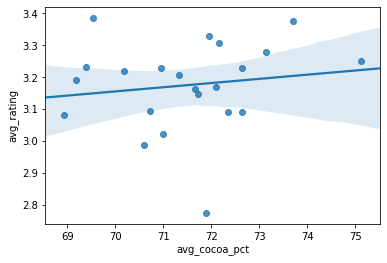

In [3]:
query = 'n_reviews > 5'
ax = sns.regplot(x='avg_cocoa_pct', y="avg_rating", data=df.query(query))